In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
# 데이터 전처리

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) /255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) /255
# 단색(Gray) : 단색이기 떄문에 끝에가 1, 컬러라면 RGB 이기 때문에 3dmf TJdnsek. 
# shape[0] 은 6만개 

# 타겟값 설정
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

맥스 풀링 참고 : https://thebook.io/080228/part05/ch16/05/
<중요한 것 2가지>
1. 자체 데이터는 이미지인데, 그 안에서 가장 큰값을 취한다는 것은 그 안에서 가장 대표되는 값을 취한다는 뜻 
    - 즉, 특징을 고스란히 뽑겠다는 뜻
2. 특징만 뽑으니, 이미지 가로세로 길이가 반으로 줄어든다. 
     - 계산량을 줄이고자 하는 목적도 있음
     
- 즉, 특징은 가져가면서 (잃어버리지 않게) 계산량을 줄이고자 할 떄 쓰는 것이 맥스 풀링이다 

In [4]:
# 모델 쌓기

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
# Conv2D : keras에서 제공하는 2차원
# Conv2D(32, ) : 그림이 1장 들어오면 32장으로 만들겠다는 의미

# CNN 에서는 마스크값이 가중치고, 
# bias 도 존재. 파이아스 파라미터도 32개 

model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) 
# 앞쪽에서 출력되는 것인 input shape 이기 떄문에, 따로 input_shape()을 줄 필요가 없다 
# 이미지 한 장을 64개로 만든다는 뜻, 새로 들어온 32개를 64개로 만든다는 뜻이 아니다 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) # 은닉층 가중치의 hidden 요솔 중 25% 를 무작위로 선택해서 꺼버리겠다는 뜻 
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [8]:
print (320+18496+1179776+1290)

1199882


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :  # 같은 파일명이 존재하는지 확인
    os.mkdir(MODEL_DIR)   # 모델 생성
    

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # 체크포인트 생성, 무엇을 체크할 것인지 지정(mointor)


early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [13]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05644, saving model to ./model/01-0.0564.hdf5

Epoch 00002: val_loss improved from 0.05644 to 0.04058, saving model to ./model/02-0.0406.hdf5

Epoch 00003: val_loss improved from 0.04058 to 0.03492, saving model to ./model/03-0.0349.hdf5

Epoch 00004: val_loss improved from 0.03492 to 0.03215, saving model to ./model/04-0.0321.hdf5

Epoch 00005: val_loss improved from 0.03215 to 0.02946, saving model to ./model/05-0.0295.hdf5

Epoch 00006: val_loss improved from 0.02946 to 0.02612, saving model to ./model/06-0.0261.hdf5

Epoch 00007: val_loss did not improve from 0.02612

Epoch 00008: val_loss did not improve from 0.02612

Epoch 00009: val_loss did not improve from 0.02612

Epoch 00010: val_loss improved from 0.02612 to 0.02611, saving model to ./model/10-0.0261.hdf5

Epoch 00011: val_loss did not improve from 0.02611

Epoch 00012: val_loss did not improve from 0.02611

Epoch 00013: val_loss did not improve from 0.02611

Epoch 00014: val_lo

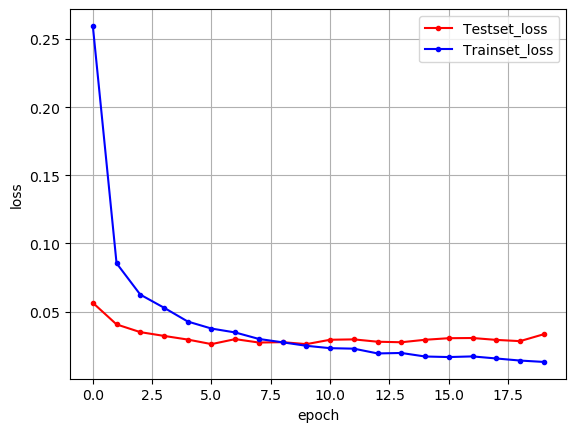

In [17]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================